<a href="https://colab.research.google.com/github/XQuyTran/APP-CQ18/blob/main/notebook/Tr%C3%ADch_xu%E1%BA%A5t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cài đặt tuần tự phần trích xuất \
chưa xử lý Canny
đã xong huMoments

# IMPORT & load data

In [1]:
import numba as nb
from numba import jit
import math
from numba import cuda

In [2]:
!pip install -U xgboost
from math import e
import pandas as pd
import numpy as np
import cv2 as cv
import random
import matplotlib.pyplot as plt
import random
from xgboost import XGBRegressor
import xgboost as xgb
import pickle
from sklearn.model_selection import GridSearchCV

     |████████████████████████████████| 193.7 MB 22 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [1]:
!gdown --id 1Eg_0c3mvQCu0SpVjLdik1-g1Tuz22ObS
!unzip -q "/content/plant-pathology-2020-fgvc7.zip"

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Eg_0c3mvQCu0SpVjLdik1-g1Tuz22ObS
To: /content/plant-pathology-2020-fgvc7.zip
100% 817M/817M [00:07<00:00, 111MB/s]


In [4]:
!git clone https://github.com/thanhtruong1712/DAMH_LTSSUD.git

Cloning into 'APP-CQ18'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 206 (delta 12), reused 18 (delta 6), pack-reused 171
Receiving objects: 100% (206/206), 13.04 MiB | 20.52 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [5]:
test_table= pd.read_csv('/content/test.csv')
train_table = pd.read_csv('/content/train.csv')

In [31]:
test_df= pd.read_csv('/content/DAMH_LTSSUD/data/test_data.csv')
test_df

,color_hist_0,color_hist_1,color_hist_2,color_hist_3,color_hist_4,color_hist_5,color_hist_6,color_hist_7,color_hist_8,color_hist_9,...,color_hist_510,color_hist_511,hu_moents_0,hu_moents_1,hu_moents_2,hu_moents_3,hu_moents_4,hu_moents_5,hu_moents_6,image_id
0,0.000000,0.000098,0.002584,0.000957,0.000000,0.000002,0.000091,0.000148,0.000000,0.001590,...,0.0,0.0,0.001837,4.584236e-07,2.238014e-11,2.553843e-11,-3.720866e-22,4.582265e-15,4.840715e-22,Test_0
1,0.000000,0.000004,0.000004,0.000054,0.000144,0.000212,0.000283,0.001736,0.000000,0.000588,...,0.0,0.0,0.001481,5.597770e-07,4.450890e-11,1.070851e-11,2.292307e-22,8.005207e-15,-4.592107e-23,Test_1
2,0.000280,0.001361,0.010671,0.023507,0.005798,0.000899,0.000076,0.000013,0.001558,0.015161,...,0.0,0.0,0.001872,6.022883e-07,1.531205e-10,1.078737e-11,-3.498816e-22,-8.337106e-15,-2.641873e-22,Test_2
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000019,0.000012,0.000000,0.000000,0.000000,...,0.0,0.0,0.002048,8.257656e-07,3.327988e-10,2.432684e-10,3.754851e-20,1.287260e-13,5.814853e-20,Test_3
4,0.000020,0.000000,0.000114,0.000432,0.000631,0.001814,0.006921,0.042756,0.000053,0.000174,...,0.0,0.0,0.001938,4.136583e-07,3.450294e-10,2.424098e-11,-1.986011e-21,-8.500032e-15,9.851749e-22,Test_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,0.000000,0.000000,0.000000,0.000250,0.002221,0.002518,0.001109,0.000000,0.000000,0.000000,...,0.0,0.0,0.001437,3.780178e-07,1.481440e-10,3.398118e-12,-7.595513e-23,-1.942525e-15,6.618902e-24,Test_1816
1817,0.004446,0.011524,0.026032,0.015492,0.001090,0.000629,0.000478,0.000000,0.000774,0.015615,...,0.0,0.0,0.001797,4.187230e-07,5.226169e-11,4.817225e-12,5.392593e-23,2.753443e-15,5.416793e-23,Test_1817
1818,0.000000,0.000000,0.000000,0.001496,0.002023,0.009307,0.006643,0.004192,0.000000,0.000000,...,0.0,0.0,0.001852,5.849666e-07,3.247010e-10,1.426994e-10,1.058449e-20,8.701660e-15,2.883551e-20,Test_1818
1819,0.000000,0.000029,0.000720,0.004849,0.011360,0.001869,0.000555,0.000029,0.000000,0.000622,...,0.0,0.0,0.001665,3.839408e-07,7.723434e-11,6.614230e-11,4.229659e-21,3.888149e-14,-2.111511e-21,Test_1819


# 1.TXL

##1.1 Load một ảnh 

In [6]:
def getSampleToShow(keyColumn, sample):
    list_sample_image = []
    sample_train = train_table[train_table[keyColumn] == 1].sample(n = sample)
    for image_id in sample_train['image_id']:
        name = "/content/images/" + image_id + ".jpg"
        image = cv.imread(name)
        im_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        list_sample_image.append(im_rgb)
    return np.array(list_sample_image)

def showImages(images):
    plt.figure(figsize=(15,15))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        
def getImageToTest():
    return cv.imread("/content/images/Train_382.jpg")

(1365, 2048, 3)

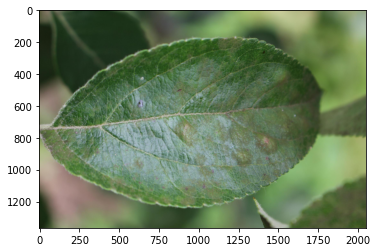

In [7]:
image = getImageToTest()
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
image.shape

In [8]:
# max(image).all()

## 1.2 Canny

### 1.2.1 canny chưa tuần tự

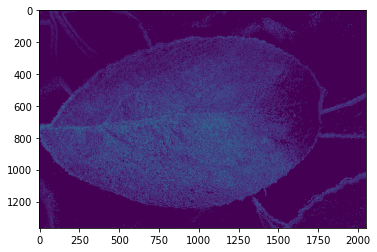

In [9]:
def applyCannyThreshold( frame, val):
    ratio = 1.2
    kernel_size = 3
    low_threshold = val
    img_blur = cv.GaussianBlur(frame, (3, 3), 0)
    detected_edges = cv.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = frame * (mask[:,:].astype(frame.dtype))
    return dst

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
drivative_image = applyCannyThreshold(gray_image, 12)
plt.imshow(drivative_image)

### 1.2.2 cannytuần tự chưa hoàn thành

In [10]:
def scale_to_0_255(img):
    min_val = np.min(img)
    max_val = np.max(img)
    new_img = (img - min_val) / (max_val - min_val) # 0-1
    new_img *= 255
    return new_img

def my_canny(img, min_val, max_val, sobel_size=3, is_L2_gradient=False):   
    #2. Noise Reduction
    smooth_img = cv.GaussianBlur(img, ksize=(5, 5), sigmaX=1, sigmaY=1)
    
    #3. Finding Intensity Gradient of the Image
    Gx = cv.Sobel(smooth_img, cv.CV_64F, 1, 0, ksize=sobel_size)
    Gy = cv.Sobel(smooth_img, cv.CV_64F, 0, 1, ksize=sobel_size)
        
    if is_L2_gradient:
        edge_gradient = np.sqrt(Gx*Gx + Gy*Gy)
    else:
        edge_gradient = np.abs(Gx) + np.abs(Gy)
    
    angle = np.arctan2(Gy, Gx) * 180 / np.pi
    
    # round angle to 4 directions
    angle = np.abs(angle)
    angle[angle <= 22.5] = 0
    angle[angle >= 157.5] = 0
    angle[(angle > 22.5) * (angle < 67.5)] = 45
    angle[(angle >= 67.5) * (angle <= 112.5)] = 90
    angle[(angle > 112.5) * (angle <= 157.5)] = 135
    
    #4. Non-maximum Suppression
    keep_mask = np.zeros(smooth_img.shape, np.uint8)
    for y in range(1, edge_gradient.shape[0]-1):
        for x in range(1, edge_gradient.shape[1]-1):
            area_grad_intensity = edge_gradient[y-1:y+2, x-1:x+2] # 3x3 area
            area_angle = angle[y-1:y+2, x-1:x+2] # 3x3 area
            current_angle = area_angle[1,1]
            current_grad_intensity = area_grad_intensity[1,1]
            
            if (current_angle == 0).any():
                if current_grad_intensity > max(area_grad_intensity[1,0], area_grad_intensity[1,2]):
                    keep_mask[y,x] = 255
                else:
                    edge_gradient[y,x] = 0
            elif (current_angle == 45).any():
                t = max(area_grad_intensity[2,0], area_grad_intensity[0,2]).any()
                if (current_grad_intensity > t):#.any():
                    keep_mask[y,x] = 255
                else:
                    edge_gradient[y,x] = 0
            elif (current_angle == 90).any():
                if (current_grad_intensity > max(area_grad_intensity[0,1], area_grad_intensity[2,1])).any():
                    keep_mask[y,x] = 255
                else:
                    edge_gradient[y,x] = 0
            elif (current_angle == 135).any():
                if (current_grad_intensity > max(area_grad_intensity[0,0], area_grad_intensity[2,2])).any():
                    keep_mask[y,x] = 255
                else:
                    edge_gradient[y,x] = 0
    
    #5. Hysteresis Thresholding    
    # canny_mask = np.zeros(smooth_img.shape, np.uint8)
    # canny_mask[(keep_mask>0) * (edge_gradient>min_val)] = 255
    
    # return scale_to_0_255(canny_mask)



In [11]:
# image = getImageToTest()
# plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [12]:
# img = image
# my_canny = my_canny(img, min_val=100, max_val=200)
# edges = cv.Canny(img, 100, 200)

# cv.imwrite('my_canny.jpg', my_canny)
# cv.imwrite('edges.jpg', edges)

## 1.3 Sử dụng phương pháp nén ảnh với threshold và liên kết các ô xung quanh để lấp khuyết ảnh.

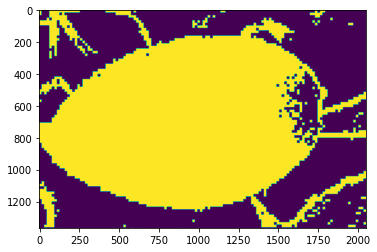

In [13]:
# Hàm dùng để nén ảnh với threshold là ratio sẽ trả ra kết quả là ảnh với block tương ứng với zip x zip
# và nếu block nào không đủ pixel yêu cầu thì là 0 còn ngược lại thì là 1
def zipImage(src, zip_x, zip_y, ratio):
    rs, cs = src.shape
    zip_rs = int(rs / zip_y)
    zip_cs = int(cs / zip_x)
    
    for idx in range(0, zip_rs * zip_y, zip_y):
        for jdx in range(0, zip_cs * zip_x, zip_x):
            block_img = src[idx : idx + zip_y, jdx : jdx + zip_x]
            num_pixel = np.sum(block_img > 0)
            if num_pixel >= zip_x*zip_y * ratio:
                block_img[:,:] = 1
            else:
                block_img[:,:] = 0

    return src

mask_image = zipImage(drivative_image, 8, 8, 0.12)
mask_image = zipImage(mask_image, 16, 16, 0.2)

plt.imshow(mask_image * 255)

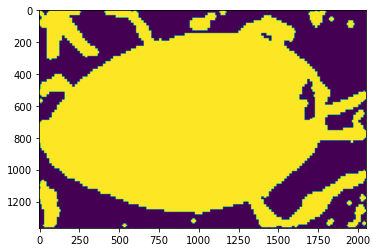

In [14]:
# Hàm dùng để liên kết các ô xung quanh để lấp khuyết sẽ trả ra kết quả là một ma trận mask
def joinNeiboorPixel(src, zip_x, zip_y, mask_size, ratio):
    rs, cs = src.shape
    zip_rs = int(rs / zip_y)
    zip_cs = int(cs / zip_x)
    half = int(mask_size / 2)
    dst = src.copy()
    for idx in range(half , zip_rs - half):
        for jdx in range(half, zip_cs - half):
            start_row_mask = (idx - half ) * zip_y
            end_row_mask = (idx + half + 1) * zip_y
            start_col_mask = (jdx - half) * zip_x
            end_col_mask = (jdx + half + 1) * zip_x
            mask_block = src[start_row_mask : end_row_mask, start_col_mask : end_col_mask]
            block_img = dst[idx * zip_y : (idx + 1) * zip_y, jdx * zip_x : (jdx + 1) * zip_x]
            num_pixel = np.sum(mask_block > 0)
            if num_pixel >= mask_size * mask_size * zip_x * zip_y * ratio:
                block_img[:,:] = 1
    return dst

mask_image = joinNeiboorPixel(mask_image, 8, 8, 3, 0.2)
mask_image = joinNeiboorPixel(mask_image, 16, 16, 3, 1 / 3)

plt.imshow(mask_image * 255)

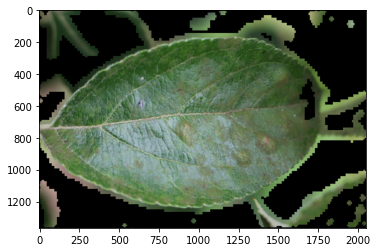

In [15]:
# Chạy mỗi hàm 2 lần để có một mask nén tốt
# và có sự liên kết giữa các pixel tốt hơn
mask_image = zipImage(drivative_image, 8, 8, 0.12)
mask_image = zipImage(mask_image, 16, 16, 0.2)
mask_image = joinNeiboorPixel(mask_image, 8, 8, 3, 0.2)
mask_image = joinNeiboorPixel(mask_image, 16, 16, 3, 1 / 3)
for chanel in range(0, 3):
    image[:,:,chanel] = image[:,:,chanel] * mask_image

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

#2 Trích xuất

##2.1 Hàm dùng để trích xuất color histogram và hue monents

In [16]:
def fd_histogram(image, mask=None):
    bins = 8
    # convert the image to HSV color-space
    image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    print("shape input calH ", image.shape)
    # compute the color histogram
    hist  = cv.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [1, 256, 1, 256, 1, 256])
    print("shape hist :", hist.shape)
    # normalize the histogram
    cv.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

def fd_hu_moments(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    # print("input Moments shape",image.shape)
    # print(image)
    feature = cv.HuMoments(cv.moments(image)).flatten()
    return feature
# fd_hu_moments(getImageToTest())    

In [17]:
def getPathImageById(image_id):
    return "../input/plant-pathology-2020-fgvc7/images/" + image_id + ".jpg"

def getFigureForImage(path):
    img = cv.imread(path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray = cv.GaussianBlur(gray, (3, 3), 0)
    mask_img = applyCannyThreshold(gray, 12)
    mask_img = zipImage(mask_img, 8, 8, 0.12)
    mask_img = zipImage(mask_img, 16, 16, 0.2)
    mask_img = joinNeiboorPixel(mask_img, 8, 8, 3, 0.15)
    mask_img = joinNeiboorPixel(mask_img, 16, 16, 3, 1 / 3)
    for chanel in range(0, 3):
        img[:,:,chanel] = img[:,:,chanel] * mask_img

    hist_figure = fd_histogram(img).astype(np.float64)
    hu_monents = fd_hu_moments(img)
    fig = np.concatenate((hist_figure, hu_monents))
    return fig


##2.2 Hàm tuần tự dùng để trích xuất hue moments

In [18]:
# %%time
image = cv.cvtColor(getImageToTest(), cv.COLOR_BGR2GRAY)
print("input Moments shape",image.shape)
cv_check=cv.moments(image)

input Moments shape (1365, 2048)


In [19]:
cv_check

{'m00': 306479339.0,
 'm01': 223000298838.0,
 'm02': 207274683384042.0,
 'm03': 2.1206417736023434e+17,
 'm10': 324108777849.0,
 'm11': 226817673314391.0,
 'm12': 2.0855106470820717e+17,
 'm20': 448419615418015.0,
 'm21': 3.078299115082143e+17,
 'm30': 6.950620535638335e+17,
 'mu02': 45015349870413.875,
 'mu03': -4260973624876704.0,
 'mu11': -9010146440682.094,
 'mu12': 2465350026644984.0,
 'mu20': 105667310412644.25,
 'mu21': 607984418445968.0,
 'mu30': -2642854986355968.0,
 'nu02': 0.00047924570047157516,
 'nu03': -2.5912292667100795e-06,
 'nu11': -9.59244780890661e-05,
 'nu12': 1.499255265141851e-06,
 'nu20': 0.0011249630257553181,
 'nu21': 3.697340461304748e-07,
 'nu30': -1.6072014969382526e-06}

In [20]:
m=np.zeros((4, 4), dtype=np.float64)
mu=np.zeros((4, 4), dtype=np.float64)
nu=np.zeros((4, 4), dtype=np.float64)

In [21]:
# Moments # tính theo công thức tại https://en.wikipedia.org/wiki/Image_moment#Central_moments
# tính toàn bộ --> tối ưu 
'''
input:  ảnh 2D
        m_ mảng 3x3 : M ~ raw Moments
        mu_ 3x3: mu ~ central moments
        nu_ 3x3: nu ~ normalized central moments 
output: nu_
'''
@jit
def cvMoments(img,m_,mu_,nu_):
  # tính m_
  for i in range(4):
    for j in range(4):
      temp=0
      if (i,j) not in [(1,3),(2,2),(2,3)]:
        for x in range(img.shape[0]):
          for y in range(img.shape[1]):
            temp=temp+img[x,y]*(x**i)*(y**j)
        m_[i,j]=temp
      if i==3:
        break
  
  # xbar ybar
  xbar=m_[1,0]/m_[0,0]
  ybar=m_[0,1]/m_[0,0]

  # tính mu
  mu_[1,1] = m_[1,1] - xbar*m_[0,1]
  mu_[0,2] = m_[2,0] - xbar*m_[1,0]
  mu_[2,0] = m_[0,2] - ybar*m_[0,1]
  mu_[1,2] = m_[2,1] - 2*xbar*m_[1,1] - ybar*m_[2,0] + 2*(xbar**2)*m_[0,1]
  mu_[2,1] = m_[1,2] - 2*ybar*m_[1,1] - xbar*m_[0,2] + 2*(ybar**2)*m_[1,0]
  mu_[0,3] = m_[3,0] - 3*xbar*m_[2,0] + 2*(xbar**2)*m_[1,0]
  mu_[3,0] = m_[0,3] - 3*ybar*m_[0,2] + 2*(ybar**2)*m_[0,1]

  #tính nu  nu_ji = mu_ji / [m00^(((i+j)/2)+1)]
  for i in range(4):
    for j in range(4):
      nu_[i,j] = mu_[i,j]/(m_[0,0]**(((i+j)/2)+1))
 
  return nu_
    


In [22]:
nu2=cvMoments(image,m,mu,nu)

In [23]:
cv.HuMoments(cv.moments(image))

array([[ 1.60420873e-03],
       [ 4.53756886e-07],
       [ 5.09638182e-11],
       [ 4.94669340e-12],
       [ 3.05320749e-23],
       [-3.27112888e-15],
       [ 7.23649166e-23]])

In [24]:
# HuMoments
@jit
def cvHuMoments(eta,hu_):
  hu_[0] =  eta[2][0] + eta[0][2]
  hu_[1] = (eta[2][0] - eta[0][2])**2 + 4*eta[1][1]**2
  hu_[2] = (eta[3][0] - 3*eta[1][2])**2 + (3*eta[2][1] - eta[0][3])**2
  hu_[3] = (eta[3][0] + eta[1][2])**2 + (eta[2][1] + eta[0][3])**2
  hu_[4] = (eta[3][0] - 3*eta[1][2])*(eta[3][0] + eta[1][2])*((eta[3][0] + eta[1][2])**2 - 3*(eta[2][1] + eta[0][3])**2) +\
        (3*eta[2][1] - eta[0][3])*(eta[2][1] + eta[0][3])*(3*(eta[3][0] + eta[1][2])**2 - (eta[2][1] + eta[0][3])**2)
  hu_[5] = (eta[2][0] - eta[0][2])*((eta[3][0] + eta[1][2])**2 - (eta[2][1] + eta[0][3])**2) + \
          4*eta[1][1]*(eta[3][0] + eta[1][2])*(eta[2][1] + eta[0][3])
  hu_[6] = (3*eta[2][1] - eta[0][3])*(eta[2][1] + eta[0][3])*(3*(eta[3][0] + eta[1][2])**2-(eta[2][1] + eta[0][3])**2) -\
          (eta[3][0] - 3*eta[1][2])*(eta[1][2] + eta[0][3])*(3*(eta[3][0] + eta[1][2])**2-(eta[2][1] + eta[0][3])**2)
  return hu_


In [25]:
hu=np.zeros(7,float) 
cvHuMoments(nu2,hu)

# nu2[0][2]

array([ 1.60420873e-03,  4.53756886e-07,  5.09638182e-11,  4.94669340e-12,
        3.05320749e-23, -3.27112888e-15,  7.29473338e-23])

##2.3 Hàm tuần tự dùng để trích xuất color histogram

In [26]:
bins=8
image = cv.cvtColor(cv.imread('/content/images/Train_382.jpg'), cv.COLOR_BGR2HSV)
hist_correct  = cv.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])

In [27]:
def compute_hist(img): 
  hist = np.zeros((8,8,8), np.int32) 
  h, w,d = img.shape[:3] 
  for i in range(h): 
    for j in range(w): 
      x,y,z=img[i][j][0]//32,img[i][j][1]//32,img[i][j][2]//32
      hist[x][y][z] =hist[x][y][z] + 1 
  return hist
hist_=compute_hist(image)

In [28]:
sum(hist_.flatten()!=hist_correct.flatten())

0

In [29]:
# pd.set_option('display.max_colwidth', 200) # Để nhìn rõ hơn

# def missing_ratio(df):
#     return (df.isna().mean() * 100).round(1)
# def num_values(df):
#     return df.nunique()
# def value_ratios(c):
#     return dict((c.value_counts(normalize=True) * 100).round(1))
# tt=df.agg([missing_ratio, num_values, value_ratios]).T
# tt.head(2)